# IMPORTING THE RELEVANT LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

# IMPORT THE DATASET

In [2]:
path = "/content/drive/MyDrive/Mall_Customers.csv"
df = pd.read_csv(path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Moving on as there are no null values and dataset is equal.

## **UNIVARIATE ANALYSIS**

Basic Statistics

In [6]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Density Plots

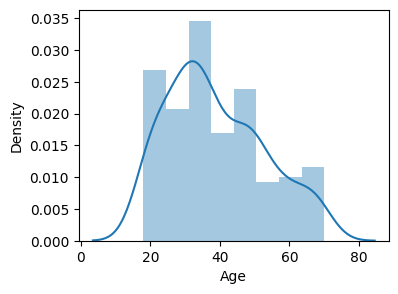

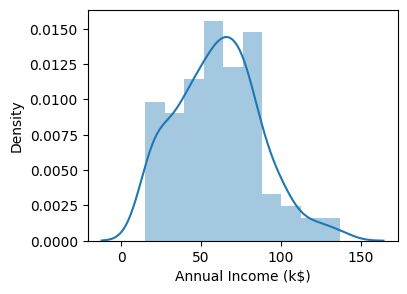

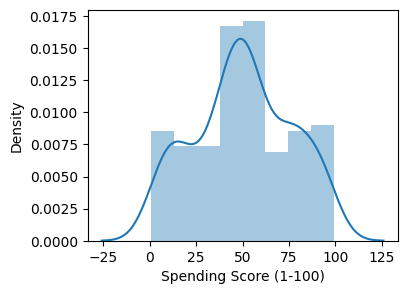

In [7]:
#distplots
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure(figsize=(4, 3))
    sns.distplot(df[i])

In [8]:
df['Gender'].astype('category')

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: category
Categories (2, object): ['Female', 'Male']

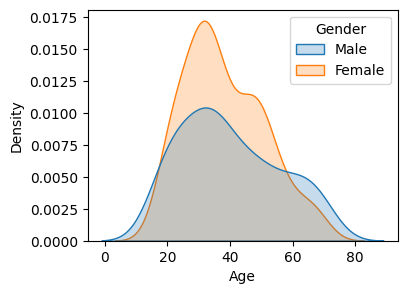

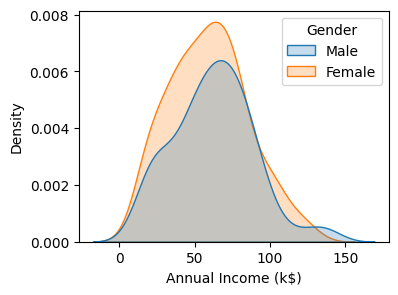

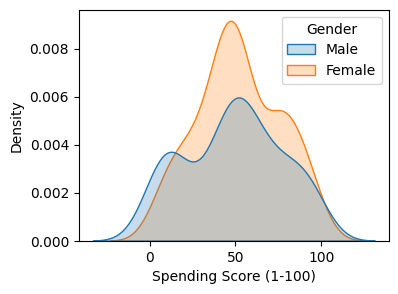

In [9]:
#kdeplots
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure(figsize=(4, 3))
    sns.kdeplot(df[i], shade = True, x=df[i], hue = df['Gender'])

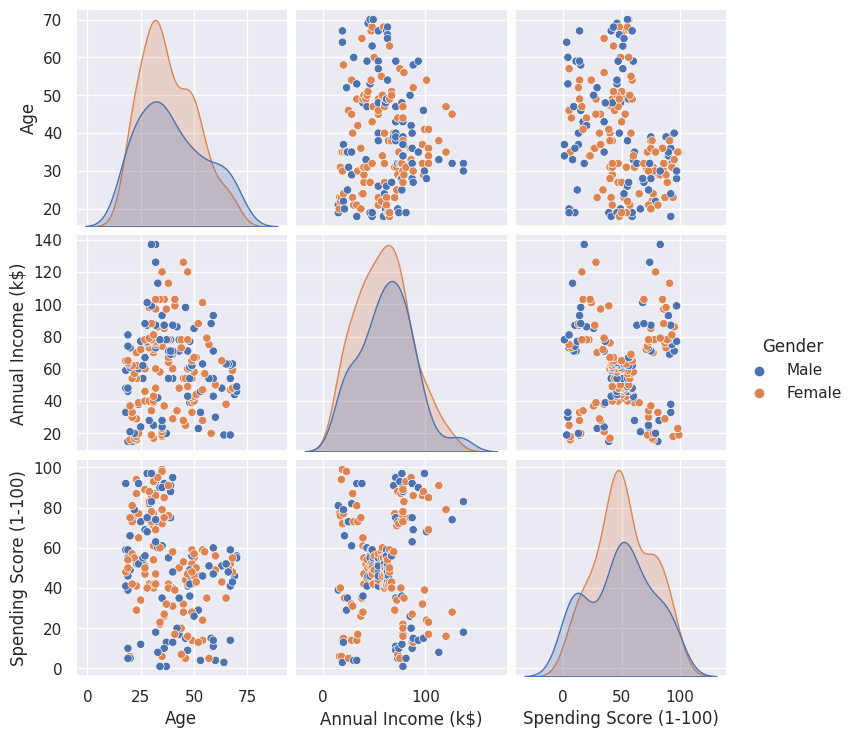

In [10]:
#Using the categorical variable for further understanding of the dataset
sns.set(rc={'figure.figsize':(14,8)})
sns.pairplot(df, hue = 'Gender')
plt.show()

In [11]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


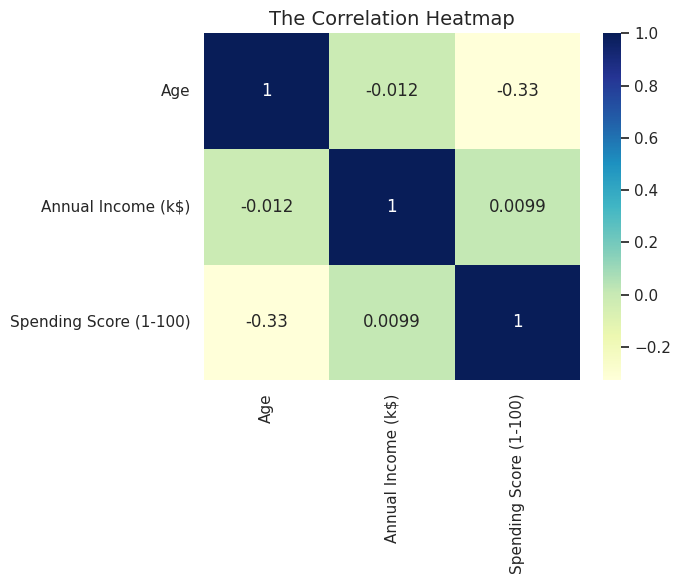

In [12]:
#Checking out the correlation of the data
map = df.corr()
plt.figure(figsize = (7, 6))
sns.heatmap(map, annot=True, cmap="YlGnBu")
plt.title("The Correlation Heatmap", size=14)
plt.tight_layout()

#plt.savefig('Mall Customers Correlation Heatmap.jpg',dpi=150, figsize=(7,6))

# CLUSTERING

In [13]:
clustering = KMeans()

In [14]:
#double square brackets so as to change it into a dataframe and no longer a panda series.
clustering.fit(df[['Annual Income (k$)']])

KMeans()

In [15]:
clustering.labels_
#these are the different clusters formed with numbers assigned to them

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6,
       6, 6], dtype=int32)

In [16]:
#add a new column to the dataframe
df['Income Cluster'] = clustering.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,4
1,Male,21,15,81,4
2,Female,20,16,6,4
3,Female,23,16,77,4
4,Female,31,17,40,4


In [17]:
#To see how many people are assigned to each cluster
df['Income Cluster'].value_counts()

0    42
3    36
4    32
7    28
1    26
5    16
2    14
6     6
Name: Income Cluster, dtype: int64

From the above it seems the clusters are a little too much.\
Now using the elbow method to find the proper number of clusters for the data.

In [18]:
clustering.inertia_

2822.4996947496966

In [19]:
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [20]:

inertia_scores

[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13278.112713472483,
 8667.679614837507,
 5050.9047619047615,
 3941.4163614163635,
 2822.4996947496966,
 2180.7817460317474,
 1746.4707792207803]

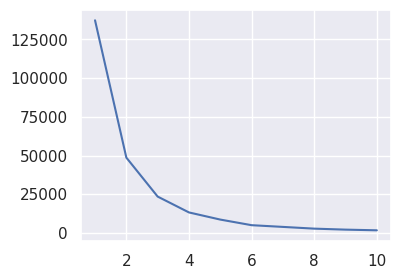

In [21]:
plt.figure(figsize = (4, 3))
plt.plot(range(1,11),inertia_scores)
plt.show()

Therefore we use 3 as the proper number of clusters.

In [22]:
clustering1 = KMeans(n_clusters = 3)

In [23]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [24]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [25]:
#Drop old Income Cluster column and new one.
df = df.drop(['Income Cluster'], axis = 1)
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [26]:
df.columns.values

array(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'], dtype=object)

In [27]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


## **Bivariate Clustering**

In [28]:
clustering2 = KMeans(n_clusters = 5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

clustering2.labels_

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [29]:
#adding this column to df
df['Spending and Income Cluster'] = clustering2.labels_

In [30]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,0
2,Female,20,16,6,1,4
3,Female,23,16,77,1,0
4,Female,31,17,40,1,4


In [31]:
clustering2.inertia_

44448.4554479337

In [32]:
inertia_scores2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

inertia_scores2

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37239.835542456036,
 30241.34361793658,
 25039.434641445507,
 21850.165282585636,
 19643.655552199736]

<function matplotlib.pyplot.show(close=None, block=None)>

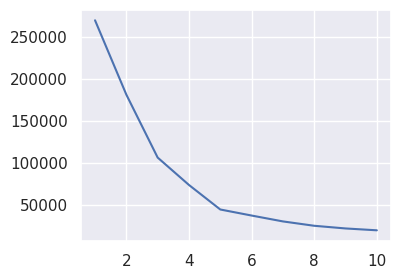

In [33]:
plt.figure(figsize = (4, 3))
plt.plot(range(1,11), inertia_scores2)
plt.show

#after seeing the number, head back up and ad the number to the kmeans object

In [34]:
#adding centroids
centers = pd.DataFrame(clustering2.cluster_centers_)
#changing the column names on the dataframe;
centers.columns = ['x', 'y']

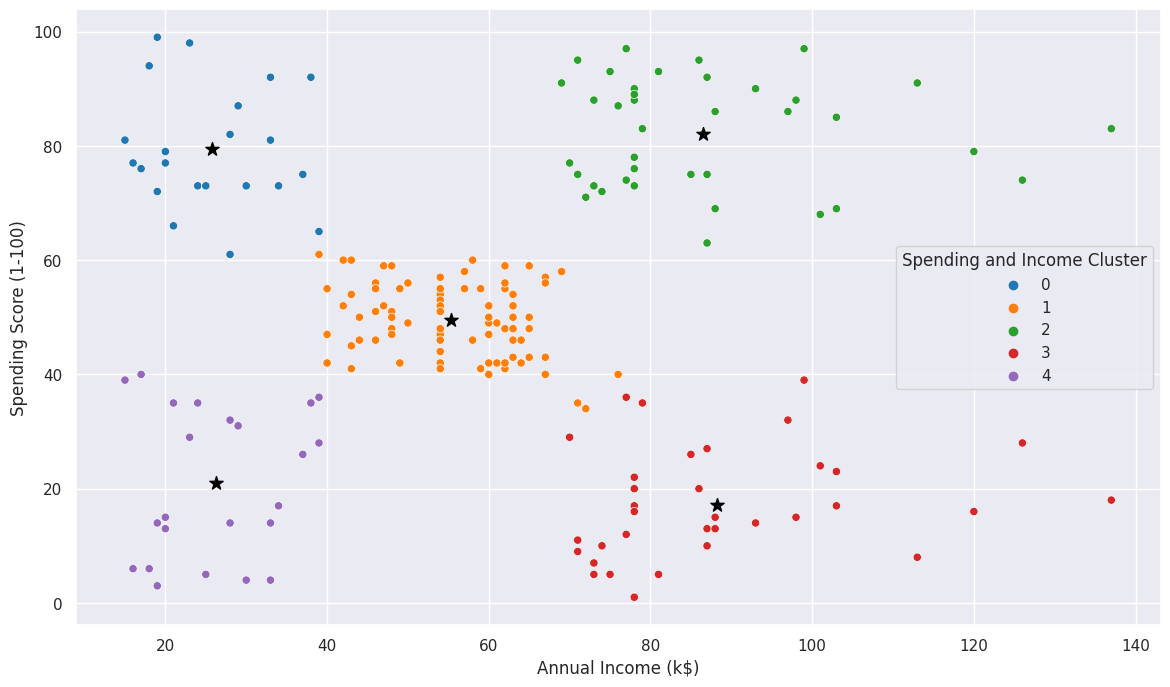

In [35]:
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Spending and Income Cluster', palette = 'tab10')
plt.scatter(x = centers['x'], y = centers['y'], s = 100, c = 'black', marker = '*')
#plt.savefig('Clustering_Bivariate.png')   this is to save the image
plt.show()

In [ ]:
df['Spending and Income Cluster'].value_counts()

In [36]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize = 'index' )
#This shows the percentage of each in the clusters. eg, 59 percent females in cluster 0.

Gender,Female,Male
Spending and Income Cluster,,
0,0.590909,0.409091
1,0.592593,0.407407
2,0.538462,0.461538
3,0.457143,0.542857
4,0.608696,0.391304


In [37]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,25.272727,25.727273,79.363636
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043
